### Extract RGB values from image
There are broadly three steps to find the dominant colors in an image:

- Extract RGB values into three lists.
- Perform k-means clustering on scaled RGB values.
- Display the colors of cluster centers.

<img src="superheroe.jpg" width="400" height="400">

In [1]:
# Import image class of matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as img
from scipy.cluster.vq import vq, kmeans, whiten
import seaborn as sns, pandas as pd

# Read batman image and print dimensions
batman_image = img.imread('superheroe.jpg')
print(batman_image.shape)

# Store RGB values of all pixels in lists r, g and b
r,g,b=[],[],[]
for row in batman_image:
    for temp_r, temp_g, temp_b in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

(169, 269, 3)


### How many dominant colors?

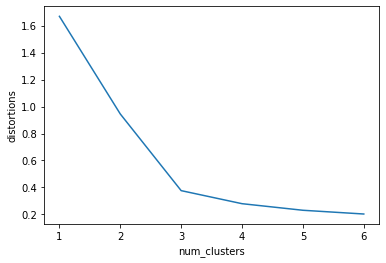

In [2]:
distortions = []
num_clusters = range(1, 7)

scaled_red = whiten(r)
scaled_green = whiten(g)
scaled_blue = whiten(b)

batman_df = pd.DataFrame({'scaled_red': scaled_red, 'scaled_blue': scaled_blue,'scaled_green':scaled_green,'red':r,'blue':b,'green':g})

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[['scaled_red','scaled_blue','scaled_green']], i)

    distortions.append(distortion)

# Create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

### Display dominant colors


To display the dominant colors, we will convert the colors of the cluster centers to their raw values and then converted them to the range of 0-1, using the following formula: 

converted_pixel = standardized_pixel * pixel_std / 255

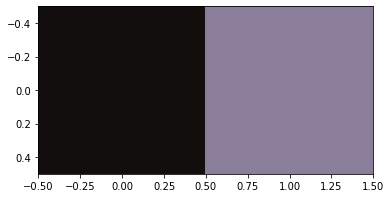

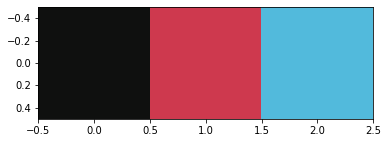

In [3]:
def display_clusters(cluster_centers):
    colors = []
    for cluster_center in cluster_centers:
        scaled_r, scaled_g, scaled_b = cluster_center
        # Convert each standardized value to scaled value
        colors.append((
            scaled_r * r_std/255,
            scaled_g * g_std/255,
            scaled_b * b_std/255
        ))

    # Display colors of cluster centers
    plt.imshow([colors])
    plt.show()



# Get standard deviations of each color
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()

# Two clusters
cluster_centers, distortion = kmeans(batman_df[['scaled_red','scaled_blue','scaled_green']], 2)
display_clusters(cluster_centers)


# Three clusters
cluster_centers, distortion = kmeans(batman_df[['scaled_red','scaled_blue','scaled_green']], 3)
display_clusters(cluster_centers)


